In [1]:
import pandas as pd

df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB



# DATA PRE-PROCESSING

## Steps:

###### 1. Dropping unecessary features.
##### 2. Object to int or float of Sex fearure
##### 3. Dealing with null values
##### 4. Readjusting feature order

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'],inplace=True)

In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,34.5,0,0,7.8292
1,1,3,female,47.0,1,0,7.0000
2,0,2,male,62.0,0,0,9.6875
3,0,3,male,27.0,0,0,8.6625
4,1,3,female,22.0,1,1,12.2875


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


In [7]:
df["Sex"].replace({"male":1,"female":0},inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,34.5,0,0,7.8292
1,1,3,0,47.0,1,0,7.0000
2,0,2,1,62.0,0,0,9.6875
3,0,3,1,27.0,0,0,8.6625
4,1,3,0,22.0,1,1,12.2875


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


# Dealing with null values

#### we have very less date as we have only 418 rows hence we will not delete the rows instead we will use mean or most_frequent method to replace with NaN

In [9]:
df.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
dtype: int64

In [10]:
df["Age"].mean()

30.272590361445783

In [11]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [12]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,34.5,0,0,7.8292
1,1,3,0,47.0,1,0,7.0000
2,0,2,1,62.0,0,0,9.6875
3,0,3,1,27.0,0,0,8.6625
4,1,3,0,22.0,1,1,12.2875


In [16]:
df.shape

(417, 7)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  417 non-null    int64  
 1   Pclass    417 non-null    int64  
 2   Sex       417 non-null    int64  
 3   Age       417 non-null    float64
 4   SibSp     417 non-null    int64  
 5   Parch     417 non-null    int64  
 6   Fare      417 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 26.1 KB


In [18]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,0.364508,2.263789,0.635492,30.200103,0.448441,0.393285,35.627188
std,0.481870,0.842077,0.481870,12.562386,0.897568,0.982419,55.907576
min,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,1.000000,30.272590,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.500000
max,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


### Readjusting feature order

#### we need survived as our 'to predict' fearure

In [19]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Survived']]
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,34.50000,0,0,7.8292,0
1,3,0,47.00000,1,0,7.0000,1
2,2,1,62.00000,0,0,9.6875,0
3,3,1,27.00000,0,0,8.6625,0
4,3,0,22.00000,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,0
414,1,0,39.00000,0,0,108.9000,1
415,3,1,38.50000,0,0,7.2500,0
416,3,1,30.27259,0,0,8.0500,0


### Plotting relationships between features

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

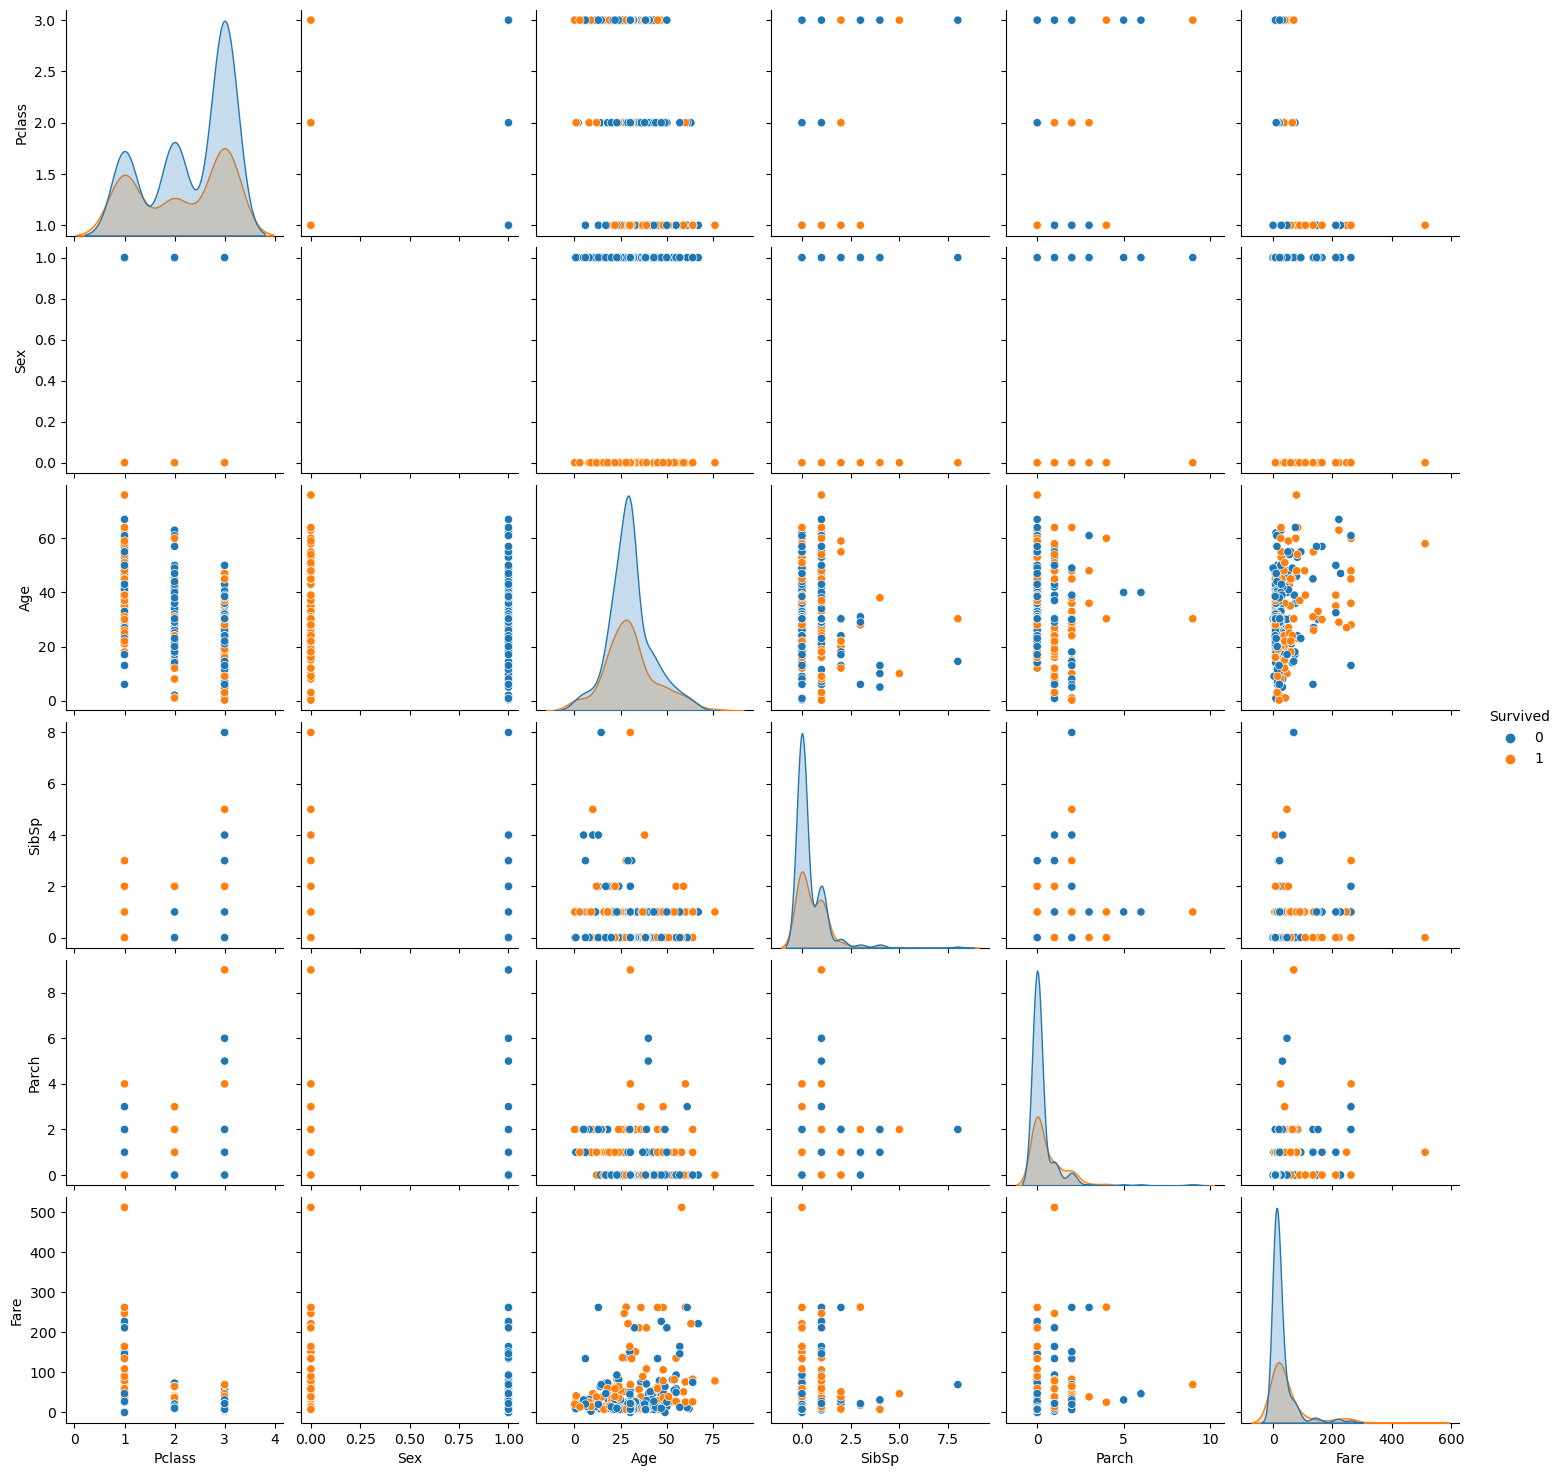

In [21]:
sns.pairplot(df,hue="Survived")

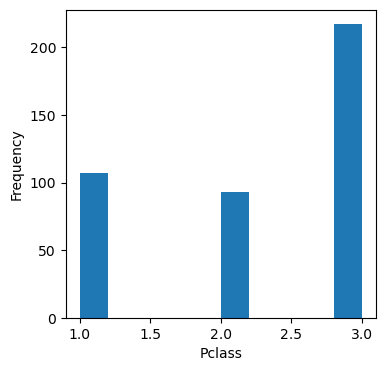

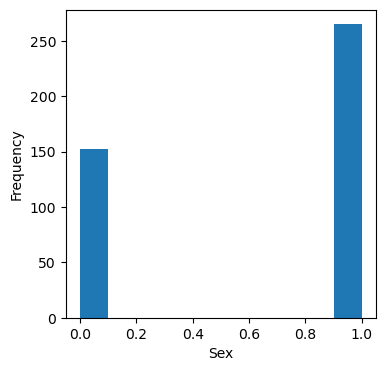

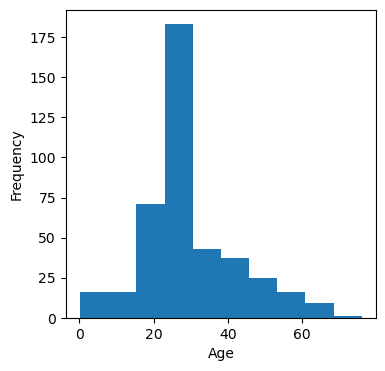

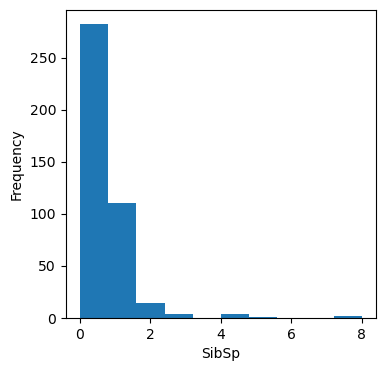

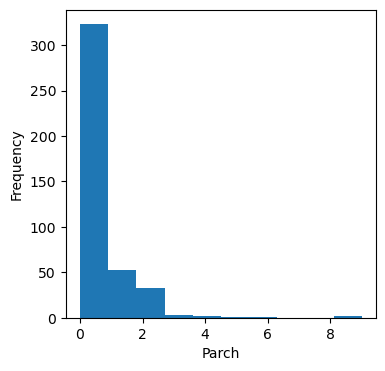

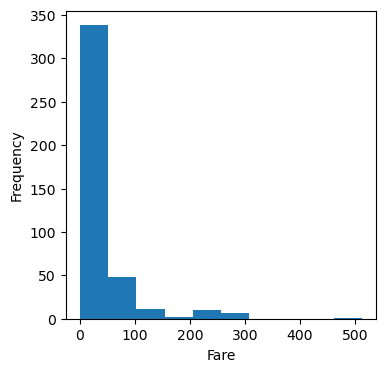

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
data = df.iloc[:,0:6]
# data
for i in data.columns:
    fig, hs = plt.subplots(figsize =(4, 4))
    hs.hist(data[i])
    plt.xlabel(i)
    plt.ylabel('Frequency')

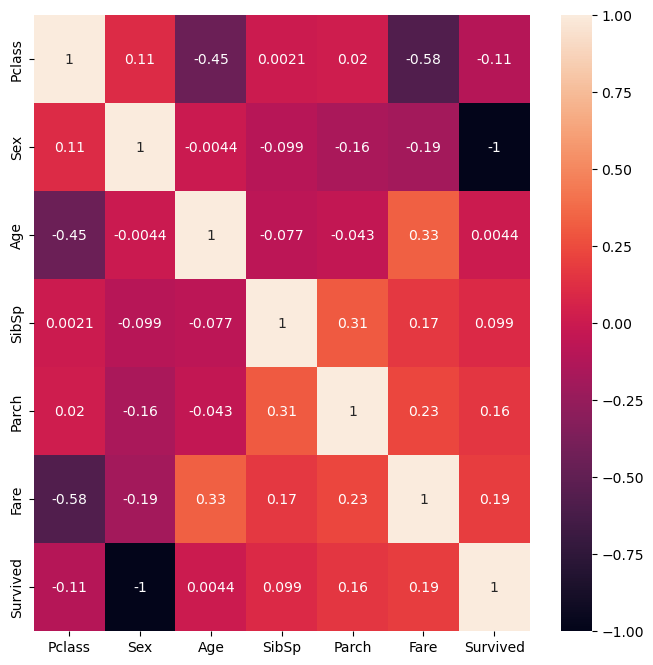

In [23]:
sns.heatmap(df.corr(),annot=True)
plt.gcf().set_size_inches(8,8)

## Model Training

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [25]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,34.50000,0,0,7.8292,0
1,3,0,47.00000,1,0,7.0000,1
2,2,1,62.00000,0,0,9.6875,0
3,3,1,27.00000,0,0,8.6625,0
4,3,0,22.00000,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,0
414,1,0,39.00000,0,0,108.9000,1
415,3,1,38.50000,0,0,7.2500,0
416,3,1,30.27259,0,0,8.0500,0


In [26]:
X = df.iloc[:,0:6]
y = df.iloc[:,-1]
print('\n================================ X Info ================================\n')
X.info()
print('\n================================ y Info ================================\n')
y.info()


================================ X Info ================================

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  417 non-null    int64  
 1   Sex     417 non-null    int64  
 2   Age     417 non-null    float64
 3   SibSp   417 non-null    int64  
 4   Parch   417 non-null    int64  
 5   Fare    417 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 22.8 KB

================================ y Info ================================

<class 'pandas.core.series.Series'>
Int64Index: 417 entries, 0 to 417
Series name: Survived
Non-Null Count  Dtype
--------------  -----
417 non-null    int64
dtypes: int64(1)
memory usage: 6.5 KB


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=104, test_size=0.30, shuffle=True)
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

291 291
126 126


In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(n_neighbors=3,p=2,metric='euclidean')
knn_fit = knn.fit(X_train,y_train)
knn_fit

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [31]:
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

## Evaluation of model

In [32]:
acc = knn.score(X_train,y_train,sample_weight=None)
print("The accuracy is: ",round(acc*100,2),"%")

The accuracy is:  98.97 %


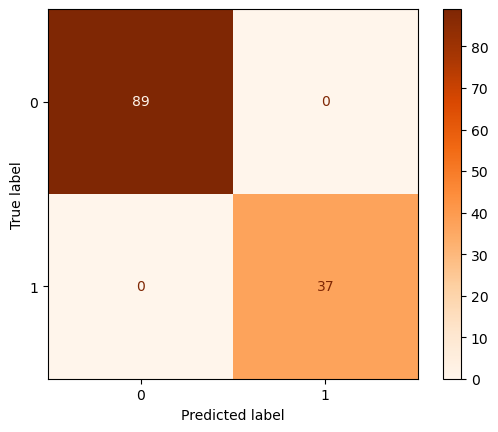

In [33]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = metrics.confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Oranges)

In [34]:
# Print precision score
from sklearn.metrics import precision_score
print("Precision Score:", precision_score(y_test, y_pred))

Precision Score: 1.0
